## Decision Making

The focus of pymoo is on optimization methods itself. However, some rudimentary decision making methods are available:

### Compromise Programming

We can use any scalarization method and use it for the purpose of post-processing. Let us assume our algorithm has converged to the pareto-front:

In [1]:
from pymoo.factory import get_problem

F = get_problem("zdt1").pareto_front() 

Then, we initalize weights and our decomposition function:

In [2]:
from pymoo.factory import get_problem, get_visualization, get_decomposition
import numpy as np

weights = np.array([0.5, 0.5])
decomp = get_decomposition("asf")

We apply the decomposition and retrieve the best value (here minimum):

In [3]:
I = get_decomposition("asf").do(F, weights).argmin()
print("Best regarding decomposition: Point %s - %s" % (I, F[I]))

Best regarding decomposition: Point 38 - [0.38383838 0.38045308]


Visualize it:

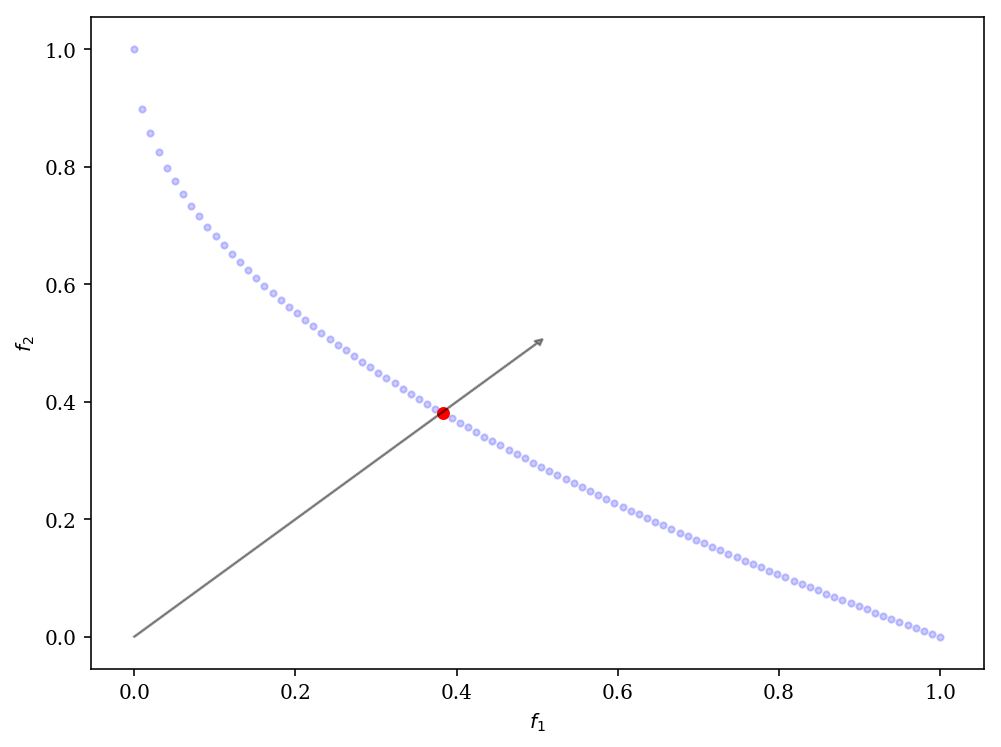

In [4]:
from pymoo.factory import get_visualization

plot = get_visualization("scatter")
plot.add(F, color="blue", alpha=0.2, s=10)
plot.add(F[I], color="red", s=30)
plot.do()
plot.apply(lambda ax: ax.arrow(0, 0, 0.5, 0.5, color='black', 
                               head_width=0.01, head_length=0.01, alpha=0.4))
plot.show()

### Pseudo-Weights

A simple way to chose a solution out of a solution set in the context of multi-objective optimization is the pseudo-weight vector approach proposed in <cite data-cite="multi_objective_book"></cite>. Respectively, the pseudo weight $w_i$ for the i-ith objective function can be calculated by:

\begin{equation}
w_i = \frac{(f_i^{max} - f_i {(x)}) \, /\,  (f_i^{max} - f_i^{min})}{\sum_{m=1}^M (f_m^{max} - f_m (x)) \, /\,  (f_m^{max} - f_m^{min})}  
\end{equation}

This equation calculates the normalized distance to the worst solution regarding each objective $i$. Please note that for non-convex Pareto fronts the pseudo weight does not correspond to the result of an optimization using the weighted sum. However, for convex Pareto-fronts the pseudo weights are an indicator of the location in the objective space.

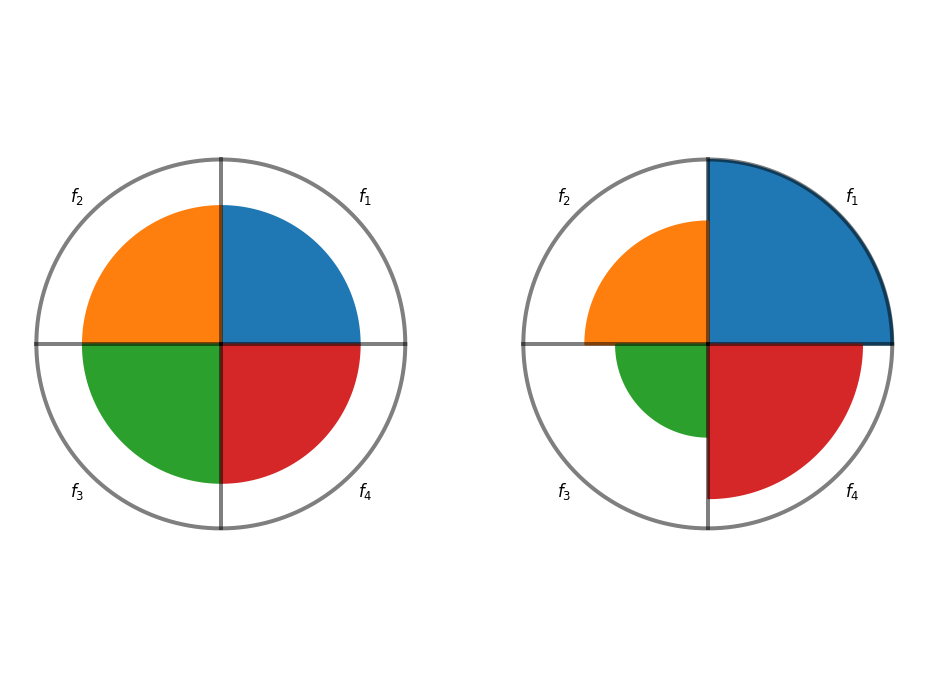

In [5]:
from pymoo.factory import get_decision_making, get_reference_directions

ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=12)
F = get_problem("dtlz1").pareto_front(ref_dirs)

weights = np.array([0.25, 0.25, 0.25, 0.25])
a, pseudo_weights = get_decision_making("pseudo-weights", weights).do(F, return_pseudo_weights=True)

weights = np.array([0.4, 0.20, 0.15, 0.25])
b, pseudo_weights = get_decision_making("pseudo-weights", weights).do(F, return_pseudo_weights=True)

plot = get_visualization("petal", bounds=(0, 0.5), reverse=True)
plot.add(F[[a, b]])
plot.show()

### High Trade-off Points

Furthermore, high trade-off points are usually of interest. We have implemented the trade-off metric proposed in <cite data-cite="high-tradeoff"></cite>. An example for 2 and 3 dimensional solution is given below:


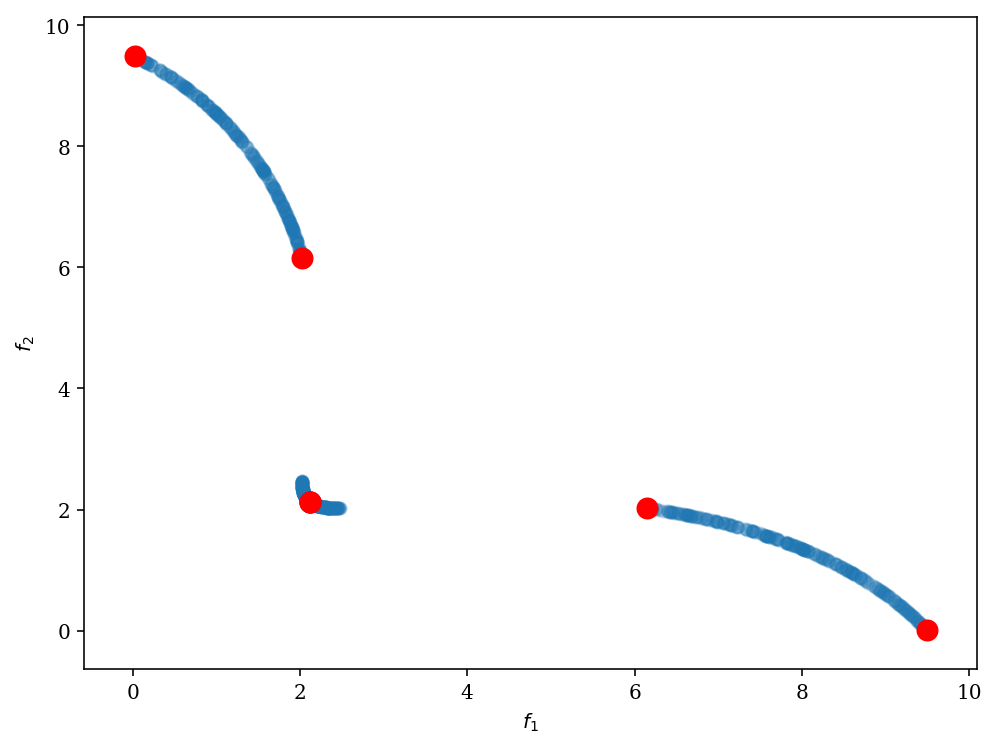

In [6]:
import os

import numpy as np

from pymoo.configuration import get_pymoo
from pymoo.factory import get_decision_making
from pymoo.visualization.scatter import scatter

pf = np.loadtxt(os.path.join(get_pymoo(), "pymoo", "usage", "decision_making", "knee-2d.out"))
dm = get_decision_making("high-tradeoff")

I = dm.do(pf)

plot = scatter()
plot.add(pf, alpha=0.2)
plot.add(pf[I], color="red", s=100)
plot.show()

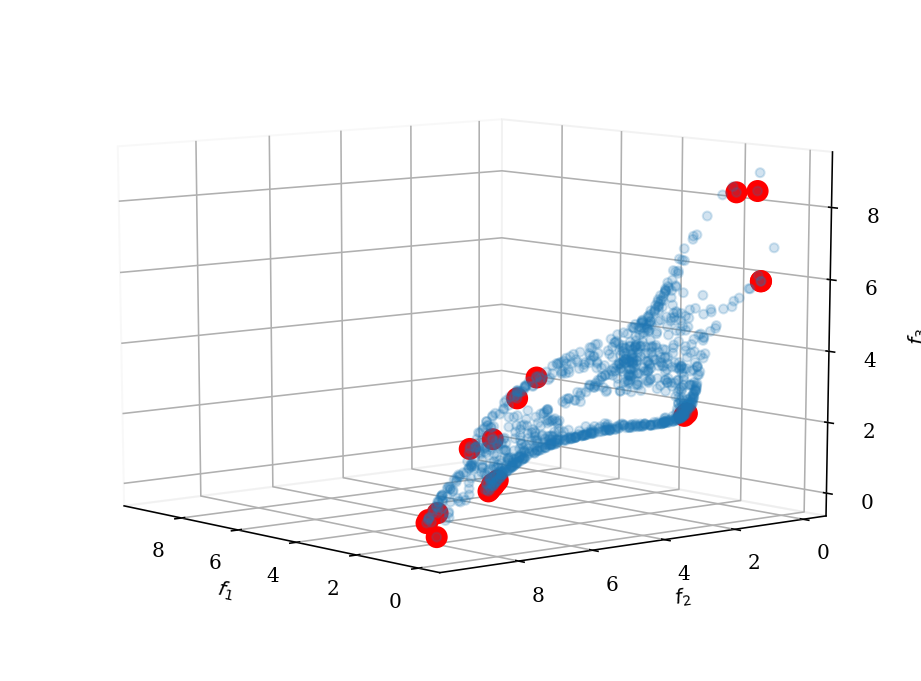

In [7]:
pf = np.loadtxt(os.path.join(get_pymoo(), "pymoo", "usage", "decision_making", "knee-3d.out"))
dm = get_decision_making("high-tradeoff")

I = dm.do(pf)

plot = scatter(angle=(10, 140))
plot.add(pf, alpha=0.2)
plot.add(pf[I], color="red", s=100)
plot.show()